### Μηχανική Μάθηση
#### 2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης k-Μeans, καθώς και τη μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα.

Ονοματεπώνυμο φοιτητή: Μέη Αρετή

Α.Μ.: 03120062

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα `indian_pines_corrected.npy` και τις αντίστοιχες επισημειώσεις `indian_pines_gt.npy` από το Google Drive:
https://drive.google.com/drive/folders/15hbGoLga9n4K6wxRP6qsLV1P-7Nj-Vht?usp=sharing

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/indian_pines_corrected.npy'

# Φόρτωση της εικόνας
image_array = np.load(file_path)
print("Μέγεθος της εικόνας:", image_array.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Μέγεθος της εικόνας: (145, 145, 200)


1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά pixel εικόνας `indian_pines_gt.npy`. Οι επισημειώσεις αυτές αντιστοιχίζουν κάθε pixel της υπερφασματικής εικόνας σε ένα τύπο από 17 διαφορετικές κατηγορίες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):

```python
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]
```

In [ ]:
labels_file_path = '/content/drive/MyDrive/Colab Notebooks/indian_pines_gt.npy'
labels_array = np.load(labels_file_path)
print(labels_array.shape)

(145, 145)


### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας/κλάσης στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις σε μορφή εικόνας. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως).

2ε. Υπολογίστε πόσα pixels της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

Ύψος εικόνας: 145
Πλάτος εικόνας: 145
Αριθμός υπερφασματικών καναλιών: 200


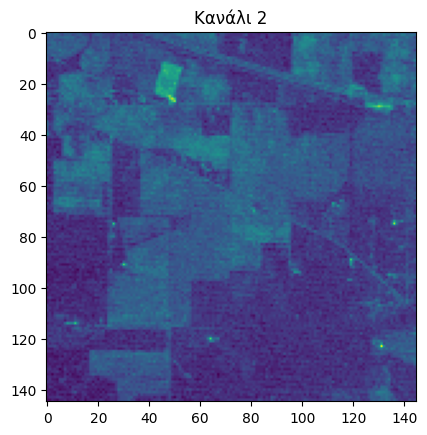

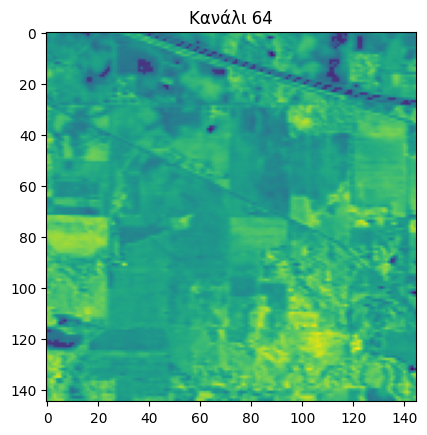

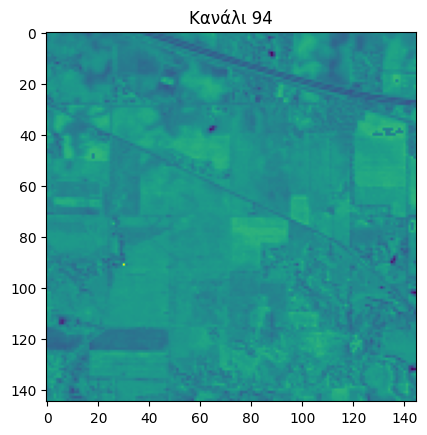

Αριθμός διαφορετικών κατηγοριών: 17


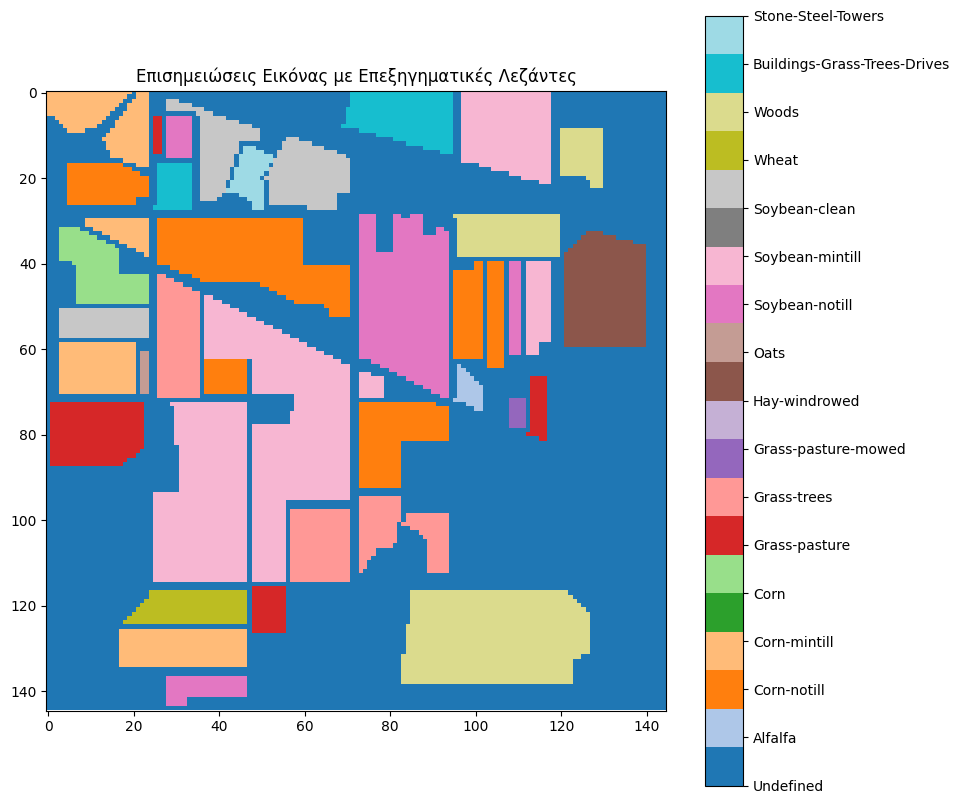

Κατηγορία 0: 10776 pixels
Κατηγορία 1: 46 pixels
Κατηγορία 2: 1428 pixels
Κατηγορία 3: 830 pixels
Κατηγορία 4: 237 pixels
Κατηγορία 5: 483 pixels
Κατηγορία 6: 730 pixels
Κατηγορία 7: 28 pixels
Κατηγορία 8: 478 pixels
Κατηγορία 9: 20 pixels
Κατηγορία 10: 972 pixels
Κατηγορία 11: 2455 pixels
Κατηγορία 12: 593 pixels
Κατηγορία 13: 205 pixels
Κατηγορία 14: 1265 pixels
Κατηγορία 15: 386 pixels
Κατηγορία 16: 93 pixels


In [ ]:
import matplotlib.pyplot as plt


# 2α
h, w, num_ch = image_array.shape
print("Ύψος εικόνας:", h)
print("Πλάτος εικόνας:", w)
print("Αριθμός υπερφασματικών καναλιών:", num_ch)

# 2β
channels = [2, 64, 94]  # 3ο, 65ο, και 95ο (0-based index)
for channel in channels:
    plt.figure()
    plt.imshow(image_array[:, :, channel])
    plt.title(f"Κανάλι {channel}")
    plt.show()

# 2γ
number_of_classes = len(np.unique(labels_array))
print("Αριθμός διαφορετικών κατηγοριών:", number_of_classes)

# 2δ
unique_labels = np.unique(labels_array)
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]

colors = plt.cm.tab20(np.arange(len(classes)))

# Δημιουργία εικόνας με τις επισημειώσεις
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.imshow(labels_array, cmap='tab20', vmin=0, vmax=len(classes) - 1)

# Προσθήκη λεζάντας
cbar = fig.colorbar(cax, ticks=np.arange(len(classes)))
cbar.set_ticklabels(classes)

plt.title("Επισημειώσεις Εικόνας με Επεξηγηματικές Λεζάντες")
plt.show()

# 2ε
class_counts = {label: np.sum(labels_array == label) for label in unique_labels}
for label, count in class_counts.items():
    print(f"Κατηγορία {label}: {count} pixels")


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν είναι ο αριθμός των pixels και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, αφαιρέστε όσα δεδομένα είναι επισημειωμένα ως `Undefined`.

💡 Χρησιμοποιήστε την `numpy reshape`

In [ ]:
image_reshaped = image_array.reshape(-1, num_ch)
# Converting to N-sized vector
labels_vector = labels_array.flatten()

# Deleting the Undefined data
valid_indices = labels_vector != 0

image_valid = image_reshaped[valid_indices]
print(image_valid.shape)
labels_valid = labels_vector[valid_indices]
print(labels_valid.shape)


(10249, 200)
(10249,)


3.β. Επιλέξτε ένα τυχαίο pixel της εικόνας από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

In [ ]:
import random

unique_labels = np.unique(labels_valid)

# random pixel from each class
random_pixels = []
for label in unique_labels:
    indices = np.where(labels_valid == label)[0]
    random_index = random.choice(indices)
    random_pixels.append(image_valid[random_index])

random_pixels = np.array(random_pixels) #used in 3c


3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων pixels.

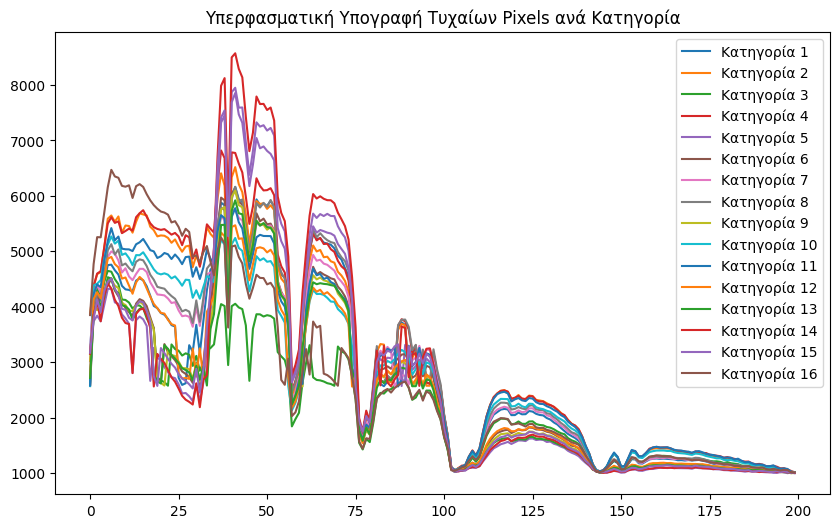

In [ ]:
plt.figure(figsize=(10, 6))
for i, label in enumerate(unique_labels):
    plt.plot(random_pixels[i], label=f"Κατηγορία {label}")

plt.title("Υπερφασματική Υπογραφή Τυχαίων Pixels ανά Κατηγορία")
plt.legend()
plt.show()


3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα.

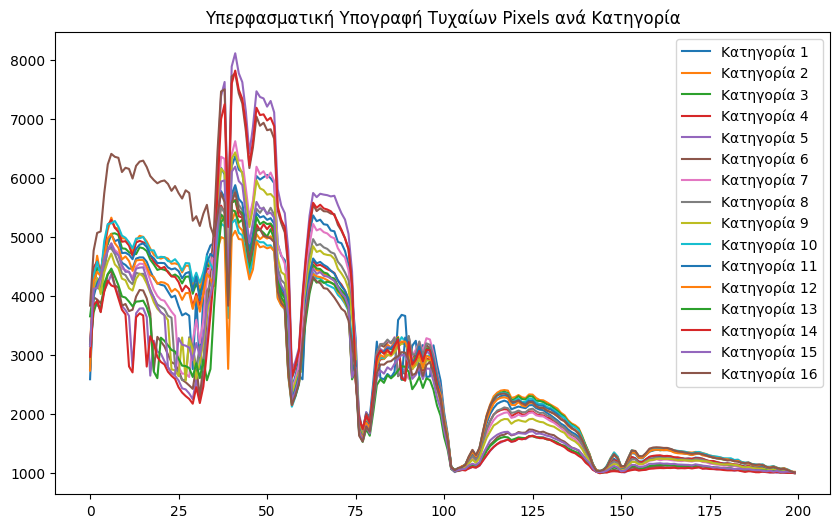

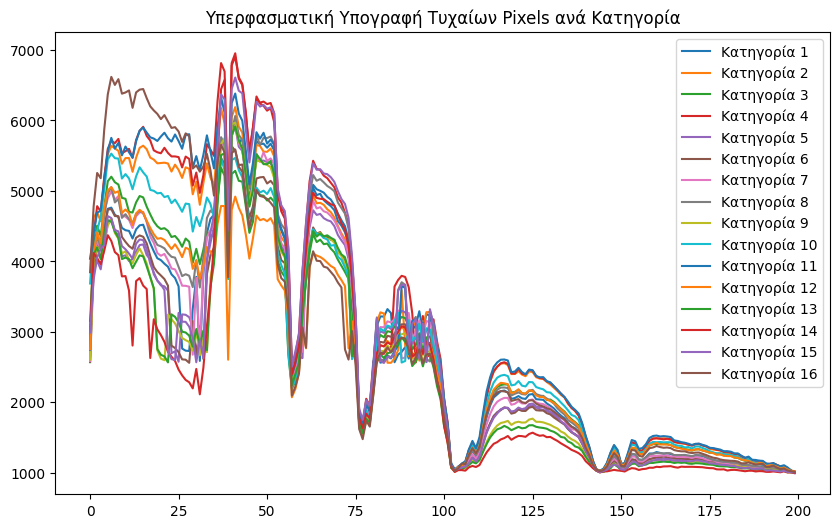

In [ ]:
for i in range(2):
    random_pixels = []
    for label in unique_labels:
        indices = np.where(labels_valid == label)[0]
        random_index = random.choice(indices)
        random_pixels.append(image_valid[random_index])

    random_pixels = np.array(random_pixels) #used in 3c
    plt.figure(figsize=(10, 6))
    for i, label in enumerate(unique_labels):
        plt.plot(random_pixels[i], label=f"Κατηγορία {label}")

    plt.title("Υπερφασματική Υπογραφή Τυχαίων Pixels ανά Κατηγορία")
    plt.legend()
    plt.show()

3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

Λαμβάνοντας υπόψιν την φασματική υπογραφή των καλλιεργειών, παρατηρούμε πως σίγουρα κάποιες είναι σίγουρα πιο εύκολα διαχωρίσιμες από άλλες, αφού τα χαρακτηριστικά τους οδηγούν σε διαφορετική και πιο ξεκάθαρη μορφή σε σχέση με τις υπόλοιπες. Όχι δεν παρέχουν όλα τα κανάλια χρήσιμη πληροφορία για τον διαχωρισμό, μιας και κάποια κανάλια παρέχουν περισσότερη και πιο χρήσιμη πληροφορία(π.χ.: μη επαναλαμβανόμενη) σε σχέση με άλλα και έτσι αποκτούν μεγαλύτερη σημασία για τον διαχωρισμό των καλλιεργειών.

Για την αποτελεσματική ταξινόμηση των καλλιεργειών θα ήταν να εντοπιστούν εκείνες οι φασματικές ζώνες που παρέχουν τη μεγαλύτερη διακριτική ισχύ και να χρησιμοποιηθούν στους αλγόριθμους ταξινόμησης. Τα κανάλια που εμφανίζουν υψηλό βαθμό επικάλυψης μπορεί να είναι λιγότερο χρήσιμα και θα μπορούσαν ενδεχομένως να παραλειφθούν για τη μείωση της διαστάσεων και της υπολογιστικής πολυπλοκότητας χωρίς να επηρεαστεί σημαντικά η ακρίβεια ταξινόμησης.

:3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

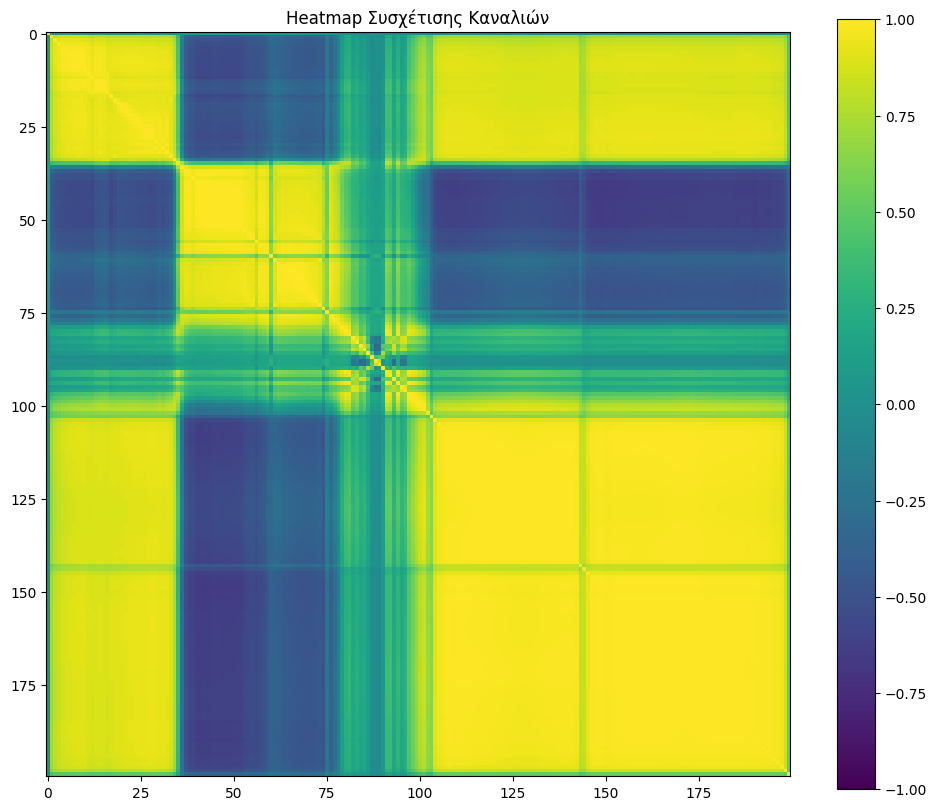

In [ ]:
# Υπολογισμός πίνακα συσχέτισης
correlation_matrix = np.corrcoef(image_reshaped.T)

# Σχεδίαση του Heatmap
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='viridis', vmin=-1, vmax=1)
plt.colorbar()
plt.title("Heatmap Συσχέτισης Καναλιών")
plt.show()


### 4. Συσταδοποίηση με χρήση του αλγορίθμου k-Means

 4.α. Εφαρμόστε τον αλγόριθμο k-Means (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=16, random_state=42)
predicted = kmeans.fit_predict(image_valid)

# Get the labels assigned by KMeans
labels_kmeans = kmeans.labels_

# Print the unique labels
unique_labels = np.unique(labels_kmeans)
print(unique_labels)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχίσουμε τα διαφορετικά ID των clusters στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [ ]:
!pip install munkres
from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([mapper.get(i, i) for i in clt])


def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)

def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes

    Create a cost matrix:
        The function make_cost_matrix is assumed to be defined elsewhere. This function likely calculates a cost matrix based on the dissimilarity or cost between predicted labels (predicted_y) and ground truth labels (y). This cost matrix is used as input for the Munkres algorithm.

    Apply the Munkres algorithm:
        The Munkres class is part of the munkres package (or similar) and is used to find the optimal assignment in the cost matrix. It returns a list of index pairs representing the optimal assignment.

    Create a mapping:
        The index pairs obtained from the Munkres algorithm are used to create a mapping (mapper) between old (predicted) labels and new (ground truth) labels.

    Print the mapping:
        The function prints the mapping information between old and new labels.

    Translate the predicted labels:
        The function translate_clustering is assumed to be defined elsewhere. This function likely takes the predicted labels and the mapping and returns the translated predicted labels.

    Return the translated predicted labels:
        The final result of the function is the translated predicted labels based on the optimal assignment found by the Munkres algorithm.

In [ ]:
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score

translated_labels_kmeans = translate_predicted_labels(labels_kmeans, labels_valid-1)

# Υπολογισμός της ακρίβειας (Accuracy Score)
acc_score = accuracy_score(labels_valid-1, translated_labels_kmeans)

# Υπολογισμός του Rand Score
rand_score = adjusted_rand_score(labels_valid-1, predicted)

# Υπολογισμός του Silhouette Score
silhouette_avg = silhouette_score(image_valid, labels_kmeans)

# Εκτύπωση των μετρικών
print(f"Accuracy Score: {acc_score}")
print(f"Rand Score: {rand_score}")
print(f"Silhouette Score: {silhouette_avg}")


map: 0 --> 10
map: 1 --> 14
map: 2 --> 2
map: 3 --> 5
map: 4 --> 0
map: 5 --> 13
map: 6 --> 1
map: 7 --> 7
map: 8 --> 9
map: 9 --> 3
map: 10 --> 15
map: 11 --> 6
map: 12 --> 8
map: 13 --> 11
map: 14 --> 4
map: 15 --> 12
Accuracy Score: 0.3554493121280125
Rand Score: 0.205184479919157
Silhouette Score: 0.2821754627335447


4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχισμένα predicted labels).

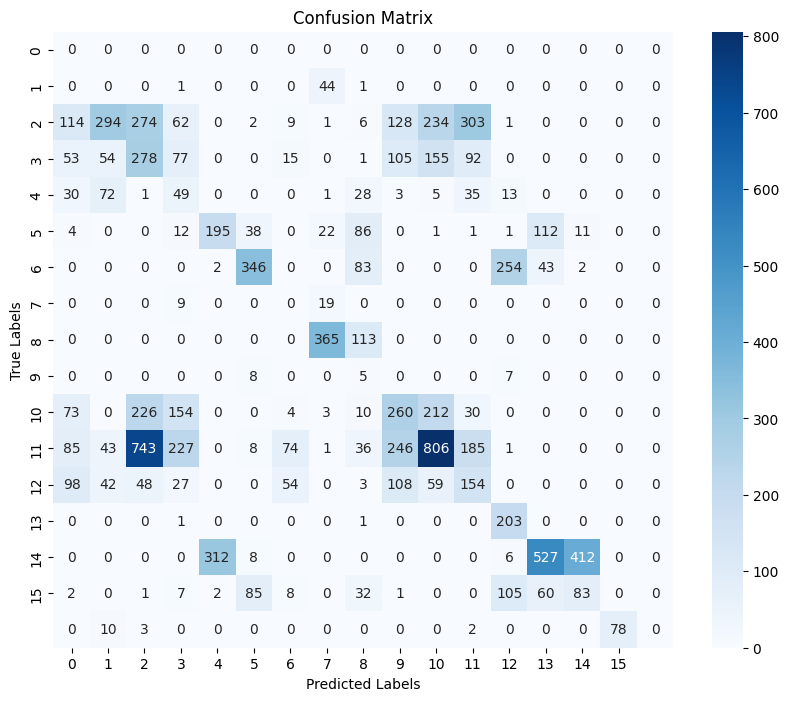

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(labels_valid, translated_labels_kmeans)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


4.ε. Όπως στο 2.δ. σχεδιάστε με χρήση της matplotlib τα predicted labels σε μορφή εικόνας.

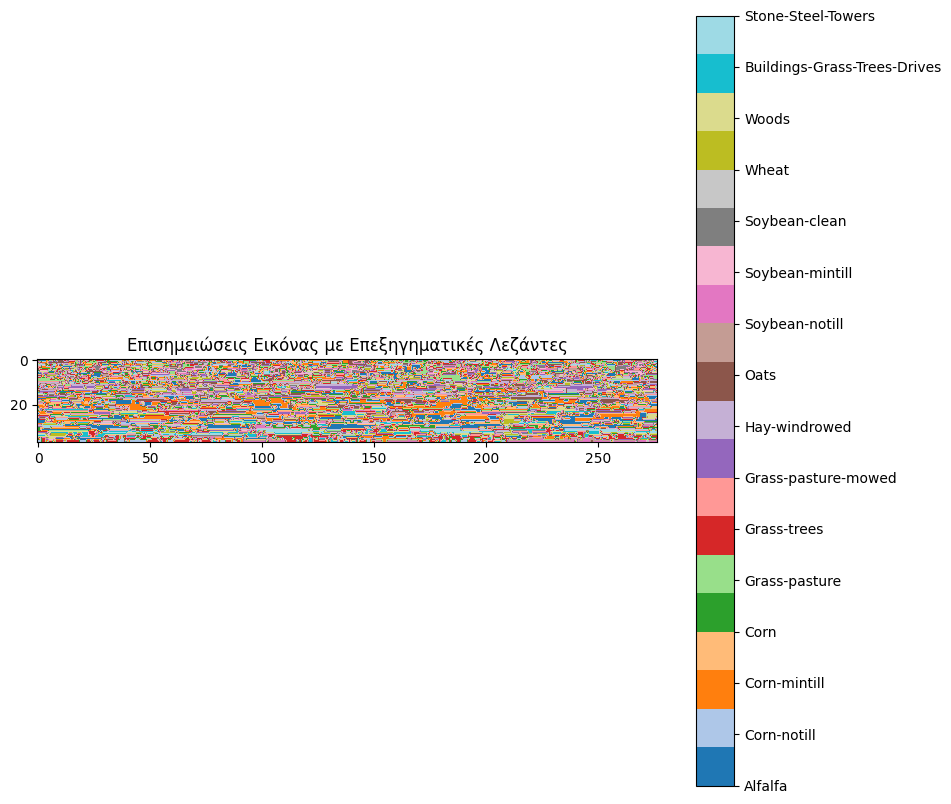

In [ ]:
import numpy as np


# Reshape the 1D array into a matrix
labels_kmeans = labels_kmeans.reshape(37, 277)

classes = [
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]

colors = plt.cm.tab20(np.arange(len(classes)))

# Δημιουργία εικόνας με τις επισημειώσεις
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.imshow(labels_kmeans, cmap='tab20', vmin=0, vmax=len(classes) - 1)

# Προσθήκη λεζάντας
cbar = fig.colorbar(cax, ticks=np.arange(len(classes)))
cbar.set_ticklabels(classes)

plt.title("Επισημειώσεις Εικόνας με Επεξηγηματικές Λεζάντες")
plt.show()

### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA with n_components=3
pca = PCA(n_components=3)
image_pca = pca.fit_transform(image_valid)

# Print the shape of the reduced data
print("Shape of the reduced data:", image_pca.shape)


Shape of the reduced data: (10249, 3)


5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [ ]:
# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Print the explained variance for each component
print("Explained Variance for Each Component:", explained_variance_ratio)

# Print the cumulative explained variance
print("Cumulative Explained Variance:", cumulative_variance)

Explained Variance for Each Component: [0.66452713 0.2654258  0.01206197]
Cumulative Explained Variance: [0.66452713 0.92995292 0.9420149 ]


PCA, or Principal Component Analysis, is a dimensionality reduction technique commonly used in machine learning and data analysis. The main goal of PCA is to transform high-dimensional data into a lower-dimensional representation while preserving the most important information in the data.

Here's a brief overview of how PCA works:

Covariance Matrix Calculation: PCA starts by calculating the covariance matrix of the original data. The covariance matrix represents the relationships between different features (dimensions) of the data.

Eigendecomposition: The next step involves finding the eigenvalues and corresponding eigenvectors of the covariance matrix. Eigenvectors represent the directions (principal components) along which the data varies the most, and eigenvalues indicate the magnitude of the variance in those directions.

Selecting Principal Components: The eigenvectors are ranked by their corresponding eigenvalues. The eigenvectors with the highest eigenvalues capture the most variance in the data and are selected as the principal components.

Projection: The original data is then projected onto the subspace defined by the selected principal components. This projection results in a lower-dimensional representation of the data.

PCA has various applications, including:

Dimensionality Reduction: It is used to reduce the number of features in a dataset while retaining as much information as possible.

Data Visualization: PCA can be used to visualize high-dimensional data in lower-dimensional spaces, making it easier to understand the structure of the data.

Noise Reduction: By focusing on the principal components with the highest variance, PCA can help filter out noise in the data.

Keep in mind that while PCA is a powerful tool, it assumes that the directions with the highest variance correspond to the most important features in the data. It may not perform well in cases where this assumption does not hold.

User
Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας n_components=3, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ
ChatGPT


### 6. Συνδυασμός μείωσης διαστατικότητας και k-Means

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

In [ ]:
'''
translated_labels_kmeans = translate_predicted_labels(labels_kmeans, labels_valid-1)
acc_score = accuracy_score(labels_valid-1, translated_labels_kmeans)
rand_score = adjusted_rand_score(labels_valid-1, predicted)
silhouette_avg = silhouette_score(image_valid, labels_kmeans)
'''

#apply pca
pca = PCA(n_components=3)
image_pca = pca.fit_transform(image_valid)


#kmeans
kmeans = KMeans(n_clusters=16, random_state=42)
predicted = kmeans.fit_predict(image_pca)
labels_kmeans_pca = kmeans.labels_
translated_labels_kmeans = translate_predicted_labels(labels_kmeans_pca, labels_valid-1)


#metrics

acc_score = accuracy_score(labels_valid-1, translated_labels_kmeans)
rand_score = adjusted_rand_score(labels_valid-1, predicted)
silhouette_avg = silhouette_score(image_valid, labels_kmeans_pca)

print(acc_score, rand_score, silhouette_avg)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 2
map: 1 --> 13
map: 2 --> 12
map: 3 --> 10
map: 4 --> 4
map: 5 --> 8
map: 6 --> 3
map: 7 --> 0
map: 8 --> 9
map: 9 --> 15
map: 10 --> 11
map: 11 --> 14
map: 12 --> 6
map: 13 --> 1
map: 14 --> 7
map: 15 --> 5
0.3450092691969948 0.20159043693986198 0.271706248868553


6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και για κάθε μία από αυτές τις τιμές τρέξτε εκ νέου τον k-Μeans, υπολογίζοντας τα τελικά scores. Για κάθε μετρική, φτιάξτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 10
map: 1 --> 12
map: 2 --> 8
map: 3 --> 6
map: 4 --> 1
map: 5 --> 11
map: 6 --> 7
map: 7 --> 14
map: 8 --> 15
map: 9 --> 5
map: 10 --> 9
map: 11 --> 4
map: 12 --> 13
map: 13 --> 3
map: 14 --> 0
map: 15 --> 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 1
map: 1 --> 7
map: 2 --> 13
map: 3 --> 10
map: 4 --> 11
map: 5 --> 5
map: 6 --> 6
map: 7 --> 2
map: 8 --> 4
map: 9 --> 3
map: 10 --> 12
map: 11 --> 15
map: 12 --> 8
map: 13 --> 9
map: 14 --> 14
map: 15 --> 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 2
map: 1 --> 13
map: 2 --> 12
map: 3 --> 10
map: 4 --> 4
map: 5 --> 8
map: 6 --> 3
map: 7 --> 0
map: 8 --> 9
map: 9 --> 15
map: 10 --> 11
map: 11 --> 14
map: 12 --> 6
map: 13 --> 1
map: 14 --> 7
map: 15 --> 5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 5
map: 2 --> 9
map: 3 --> 4
map: 4 --> 7
map: 5 --> 0
map: 6 --> 3
map: 7 --> 14
map: 8 --> 1
map: 9 --> 6
map: 10 --> 10
map: 11 --> 8
map: 12 --> 12
map: 13 --> 15
map: 14 --> 13
map: 15 --> 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 13
map: 2 --> 12
map: 3 --> 5
map: 4 --> 3
map: 5 --> 1
map: 6 --> 4
map: 7 --> 6
map: 8 --> 9
map: 9 --> 0
map: 10 --> 7
map: 11 --> 8
map: 12 --> 10
map: 13 --> 14
map: 14 --> 15
map: 15 --> 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 5
map: 1 --> 10
map: 2 --> 4
map: 3 --> 13
map: 4 --> 9
map: 5 --> 2
map: 6 --> 11
map: 7 --> 7
map: 8 --> 14
map: 9 --> 12
map: 10 --> 6
map: 11 --> 0
map: 12 --> 1
map: 13 --> 15
map: 14 --> 3
map: 15 --> 8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 0
map: 1 --> 9
map: 2 --> 14
map: 3 --> 11
map: 4 --> 5
map: 5 --> 2
map: 6 --> 4
map: 7 --> 10
map: 8 --> 7
map: 9 --> 12
map: 10 --> 6
map: 11 --> 3
map: 12 --> 1
map: 13 --> 15
map: 14 --> 13
map: 15 --> 8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 10
map: 1 --> 5
map: 2 --> 4
map: 3 --> 0
map: 4 --> 9
map: 5 --> 1
map: 6 --> 6
map: 7 --> 2
map: 8 --> 14
map: 9 --> 11
map: 10 --> 12
map: 11 --> 8
map: 12 --> 3
map: 13 --> 7
map: 14 --> 15
map: 15 --> 13


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 13
map: 1 --> 3
map: 2 --> 6
map: 3 --> 1
map: 4 --> 11
map: 5 --> 9
map: 6 --> 12
map: 7 --> 5
map: 8 --> 10
map: 9 --> 8
map: 10 --> 7
map: 11 --> 2
map: 12 --> 14
map: 13 --> 4
map: 14 --> 0
map: 15 --> 15


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 5
map: 2 --> 3
map: 3 --> 0
map: 4 --> 1
map: 5 --> 12
map: 6 --> 6
map: 7 --> 9
map: 8 --> 4
map: 9 --> 7
map: 10 --> 15
map: 11 --> 8
map: 12 --> 2
map: 13 --> 10
map: 14 --> 14
map: 15 --> 13


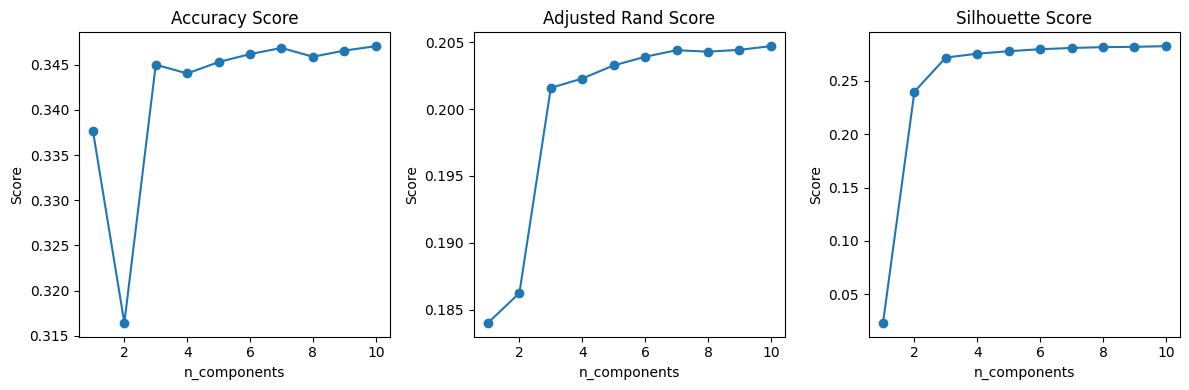

In [ ]:
import matplotlib.pyplot as plt

# Λίστες για αποθήκευση των μετρικών
acc_scores = []
rand_scores = []
silhouette_avgs = []

# Δοκιμάζετε τιμές για n_components από 1 έως 10
for n_components in range(1, 11):
    # Εφαρμογή PCA
    pca = PCA(n_components=n_components)
    image_pca = pca.fit_transform(image_valid)

    # Εφαρμογή k-Means
    kmeans = KMeans(n_clusters=16, random_state=42)
    predicted = kmeans.fit_predict(image_pca)
    labels_kmeans_pca = kmeans.labels_
    translated_labels_kmeans = translate_predicted_labels(labels_kmeans_pca, labels_valid-1)

    # Υπολογισμός μετρικών
    acc_score = accuracy_score(labels_valid-1, translated_labels_kmeans)
    rand_score = adjusted_rand_score(labels_valid-1, predicted)
    silhouette_avg = silhouette_score(image_valid, labels_kmeans_pca)

    # Αποθήκευση των μετρικών
    acc_scores.append(acc_score)
    rand_scores.append(rand_score)
    silhouette_avgs.append(silhouette_avg)

# Δημιουργία διαγραμμάτων
plt.figure(figsize=(12, 4))

# Accuracy Score
plt.subplot(1, 3, 1)
plt.plot(range(1, 11), acc_scores, marker='o')
plt.title('Accuracy Score')
plt.xlabel('n_components')
plt.ylabel('Score')

# Adjusted Rand Score
plt.subplot(1, 3, 2)
plt.plot(range(1, 11), rand_scores, marker='o')
plt.title('Adjusted Rand Score')
plt.xlabel('n_components')
plt.ylabel('Score')

# Silhouette Score
plt.subplot(1, 3, 3)
plt.plot(range(1, 11), silhouette_avgs, marker='o')
plt.title('Silhouette Score')
plt.xlabel('n_components')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


Η επιλογή του αριθμού συστατικών (n_components) στο clustering έχει σημαντική επίδραση στην απόδοση του μοντέλου. Όταν ο αριθμός αυτός είναι ίσος με 2, τόσο ο Accurate Score όσο και το Silhouette Score υποδηλώνουν ότι αυτή η επιλογή δεν είναι βέλτιστη για τα δεδομένα.

Η σταθεροποίηση του Accurate Score υποδηλώνει την ύπαρξη ενός ιδανικού σημείου, όπου η λύση γίνεται σταθερή. Αντίστοιχα, η αύξηση του Rand Score υποδηλώνει ότι τα συστατικά καθίστανται πιο ευδιάκριτα με τη χρήση περισσότερων συστατικών.

Το Silhouette Score επισημαίνει την ανάγκη για ισορροπία μεταξύ της συνοχής συστάδας και του διαχωρισμού, καθώς αυξάνεται ο αριθμός των συστατικών. Συνήθως, η επιλογή n_components εξαρτάται από την εξισορρόπηση αυτών των μετρήσεων, σε συνδυασμό με τη γνώση του τομέα των δεδομένων.

Συνήθως, το clustering συνδυάζεται με το Silhouette Score για την εύρεση του βέλτιστου αριθμού συστατικών, εξετάζοντας το σημείο όπου η μέτρηση μειώνεται με πιο αργό ρυθμό. Από τα γραφήματα φαίνεται ότι ένας αριθμός συστατικών μεταξύ 2 και 10 μπορεί να είναι κατάλληλος, αφού τα Accurate Score και Rand Score παρουσιάζουν βελτίωση και σταθεροποίηση, ενώ το Silhouette Score μειώνεται πιο αργά μετά από αρχική πτώση. Παρ' όλα αυτά, η βέλτιστη επιλογή απαιτεί περαιτέρω ανάλυση, λαμβάνοντας υπόψη τα πραγματικά δεδομένα και το πλαίσιο του συνόλου δεδομένων.